# Customer Market Basket Analysis


## 1. Framing the Business Problem

**Association Analysis: Basic Concepts and Algorithms**

Many business enterprises accumulate large quantities of data from their day-to-day operations. For example, huge amounts of customer purchase data are collected daily at the checkout counters of grocery stores. Such data is commonly known as market basket transactions.

Such valuable information can be used to support a variety of business-related applications such as marketing promotions, inventory management, and customer relationship management.

Association analysis, which is useful for discovering interesting relationships hidden in large data sets uncovers relationships that can be represented in the form of sets of items present in many transactions, which are known as frequent itemsets, or association rules. Retailers can use these types of
rules to help them identify new opportunities for crossselling their products to the customers.

There are two key issues that need to be addressed when applying association analysis to market basket data. First, discovering patterns from a large  transaction data set can be computationally expensive. Second, some of the discovered patterns may be spurious (happen simply by chance) and even for non-spurious patterns, some are more interesting than others.

The strength of an association rule can be measured in terms of its support and confidence. Support is an important measure because a rule that has very low support might occur simply by chance. Also, from a business perspective a low support rule is unlikely to be interesting because it might not be profitable to promote items that customers seldom buy together. Confidence, on the other hand, measures the reliability of the inference made by a rule.

The inference made by an association rule does not necessarily imply causality.

Therefore, a common strategy adopted by many association rule mining algorithms is to decompose the problem into two major subtasks: 

1. Frequent Itemset Generation, whose objective is to find all the itemsets that satisfy the minsup threshold.

2. Rule Generation, whose objective is to extract all the high confidence rules from the frequent itemsets found in the previous step. These rules are called strong rules.

The computational requirements for frequent itemset generation are generally
more expensive than those of rule generation.

There are two main approaches to tackle this kind of tasks. Apriori and Fpgrowth. Aprorio states that if an itemset is frequent, then all of its subsets must also be frequent. The computational complexity of the Apriori algorithm, which includes both its runtime and storage, can be affected by a number of factors such as: Support Threshold, Number of Items (Dimensionality), Number of Transactions, Average Transaction Width, among others.

An alternative algorithm called FP-growth takes a radically different approach to discovering frequent itemsets. The algorithm does not subscribe to the generate-and-test paradigm of Apriori. Instead, it encodes the data set using a compact data structure called an FP-tree and extracts frequent itemsets  directly from this structure.

An FP-tree is a compressed representation of the input data. It is constructed
by reading the data set one transaction at a time and mapping each
transaction onto a path in the FP-tree. 

In this particular project, I'll be working with information of purchases made by customers of FoodMart. I'll be using both Apriori and FPgrowth algorithms very commonly applied in association techniques.

**About Foodmart**

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

## 2. Loading libraries and dataset

**Importing Libraries**

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
pip install squarify

In [ ]:
pip install gapminder

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import squarify
import networkx as nx
import warnings
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
customer=pd.read_csv("customer.csv")
product=pd.read_csv("product.csv")
product_class=pd.read_csv("product_class.csv")
region=pd.read_csv("region.csv")
df=pd.read_csv("sales.csv")
store=pd.read_csv("store.csv")
time_by_day=pd.read_csv("time_by_day.csv")

In [ ]:
df=df.merge(customer,on='customer_id')

In [ ]:
df=df.merge(product,on='product_id')

In [ ]:
df=df.merge(product_class,on='product_class_id')

In [ ]:
df=df.merge(store,on='store_id')

In [ ]:
df=df.merge(region,on='region_id')

In [ ]:
df=df.merge(time_by_day,on='time_id')

In [ ]:
df.to_csv("Foodmart_dataset.csv")

In [ ]:
df.shape

(269720, 74)

## 3. Exploratory Data Analysis (EDA)

In [ ]:
##i'll be using only 100k rows of the dataset because Apriori is a very deep and computational expensive algorithm to apply it on the entire dataset.
df=pd.read_csv("Foodmart_dataset.csv", nrows=100000)

In [ ]:
df.shape

(100000, 75)

In [ ]:
df.describe(include='all')

Unnamed: 0    product_id        time_id    customer_id  \
count   100000.000000  100000.00000  100000.000000  100000.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean     49999.500000     783.99547     787.140160    5073.182860   
std      28867.657797     447.15649     198.157314    2904.597901   
min          0.000000       1.00000     371.000000       3.000000   
25%      24999.750000     398.00000     655.000000    2528.000000   
50%      49999.500000     786.00000     798.000000    4998.000000   
75%      74999.250000    1173.00000     952.000000    7582.250000   
max      99999.000000    1559.00000    1090.000000   10281.000000   

             store_id    store_sales     store_cost     unit_sales       city  \
count   100000.000000  100000.000000  100000.000000  100000.000000     100000   
unique            NaN            NaN            NaN            NaN        107   
top               NaN            NaN            NaN            NaN  Bremerton   
freq              NaN            NaN            NaN            NaN       8349   
mean        11.714940       6.492662       2.598619       3.067860        NaN   
std          6.915105       3.458596       1.450007       0.849731        NaN   
min          1.000000       0.500000       0.160000       1.000000        NaN   
25%          6.000000       3.760000       1.478400       3.000000        NaN   
50%         12.000000       5.900000       2.368000       3.000000        NaN   
75%         17.000000       8.640000       3.470400       4.000000        NaN   
max         24.000000      23.640000      10.180200       6.000000        NaN   

       state_province country  customer_region_id yearly_income  gender  \
count          100000  100000       100000.000000        100000  100000   
unique             12       3                 NaN             8       2   
top                WA     USA                 NaN   $30K - $50K       F   
freq            42558   69488                 NaN         33312   50176   
mean              NaN     NaN           62.209850           NaN     NaN   
std               NaN     NaN           28.992112           NaN     NaN   
min               NaN     NaN            1.000000           NaN     NaN   
25%               NaN     NaN           28.000000           NaN     NaN   
50%               NaN     NaN           75.000000           NaN     NaN   
75%               NaN     NaN           85.000000           NaN     NaN   
max               NaN     NaN          109.000000           NaN     NaN   

        total_children  num_children_at_home            education  \
count    100000.000000         100000.000000               100000   
unique             NaN                   NaN                    5   
top                NaN                   NaN  Partial High School   
freq               NaN                   NaN                29689   
mean          2.503220              0.779200                  NaN   
std           1.495497              1.256234                  NaN   
min           0.000000              0.000000                  NaN   
25%           1.000000              0.000000                  NaN   
50%           2.000000              0.000000                  NaN   
75%           4.000000              1.000000                  NaN   
max           5.000000              5.000000                  NaN   

       date_accnt_opened member_card    occupation houseowner  num_cars_owned  \
count             100000      100000        100000     100000   100000.000000   
unique              1579           4             5          2             NaN   
top             14/07/91      Bronze  Professional          Y             NaN   
freq                 333       56334         32066      60340             NaN   
mean                 NaN         NaN           NaN        NaN        2.206

In [ ]:
##finding null values
df.isnull().sum()

Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

In [ ]:
df.dtypes

Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

In [ ]:
##Checking Datatypes, Mising Value, Unique Value
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [ ]:
temp

data_type  null_count  unique_count
Unnamed: 0               int64           0        100000
product_id               int64           0          1559
time_id                  int64           0           235
customer_id              int64           0          6814
store_id                 int64           0            24
store_sales            float64           0          1050
store_cost             float64           0         11061
unit_sales               int64           0             6
city                    object           0           107
state_province          object           0            12
country                 object           0             3
customer_region_id       int64           0           108
yearly_income           object           0             8
gender                  object           0             2
total_children           int64           0             6
num_children_at_home     int64           0             6
education               object           0             5
date_accnt_opened       object           0          1579
member_card             object           0             4
occupation              object           0             5
houseowner              object           0             2
num_cars_owned           int64           0             5
product_class_id         int64           0           102
brand_name              object           0           111
product_name            object           0          1559
SKU                      int64           0          1559
SRP                    float64           0           315
gross_weight           float64           0           376
net_weight             float64           0           332
recyclable_package       int64           0             2
low_fat                  int64           0             2
units_per_case           int64           0            36
cases_per_pallet         int64           0            10
shelf_width            float64           0           534
shelf_height           float64           0           524
shelf_depth            float64           0           488
subcategory             object           0           102
category                object           0            45
department              object           0            22
family                  object           0             3
store_type              object           0             5
region_id                int64           0            23
store_name              object           0            24
store_number             int64           0            24
store_street_address    object           0            24
store_city              object           0            23
store_state             object           0            10
store_postal_code        int64           0             1
store_country           object           0             3
store_manager           object           0            22
store_phone             object           0            24
store_fax               object           0            24
first_opened_date       object           0            24
last_remodel_date       object           0            24
store_sqft               int64           0            24
grocery_sqft             int64           0            24
frozen_sqft              int64           0            24
meat_sqft                int64           0            24
coffee_bar               int64           0             2
video_store              int64           0             2
salad_bar                int64           0             2
prepared_food            int64           0             2
florist                  int64           0             2
sales_city              object           0            23
sales_state_province    object           0            10
sales_district          object           0            21
sales_region            object           0             7
sales_country           object           0             3
sales_district_id        int64           0            21
the_date                object 

In [ ]:
df.drop_duplicates()

### 3.1 Univariate Analysis 

Text(0.5, 0, 'department id')

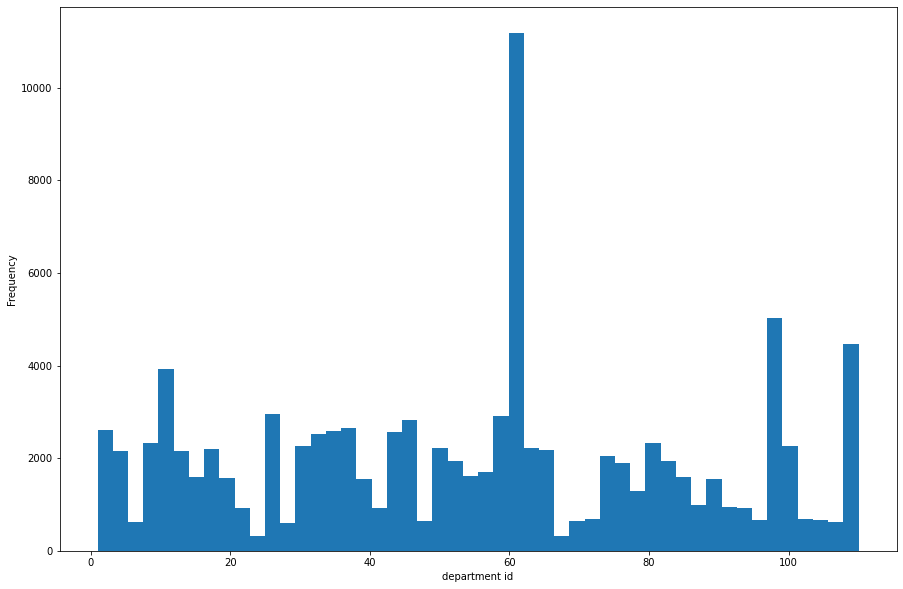

In [ ]:
##frequency by department
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

Text(0.5, 0, 'product id')

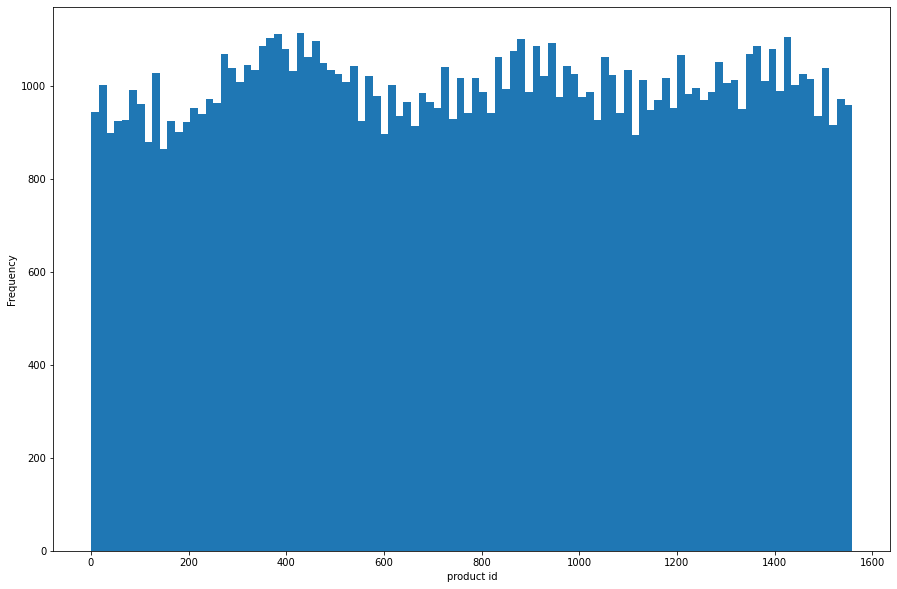

In [ ]:
##by product ID
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

Text(0.5, 0, 'Unit Sales')

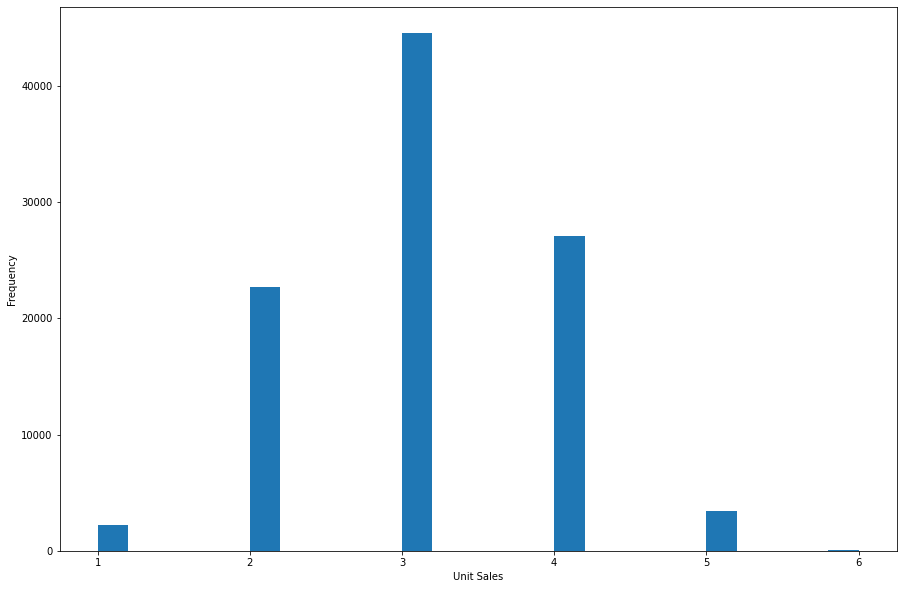

In [ ]:
##by unit sales
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x7f8ade779cd0>,
 <a list of 4 Text major ticklabel objects>)

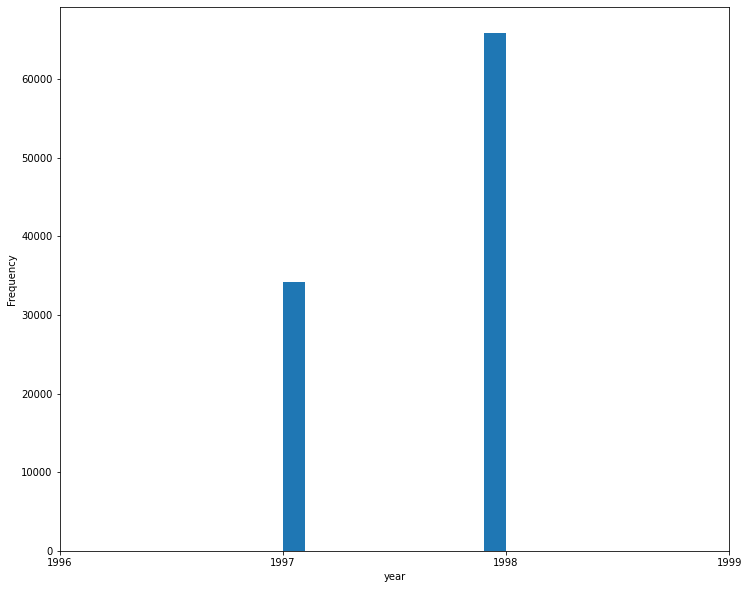

In [ ]:
##understanding date information
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

Text(0.5, 0, 'Month')

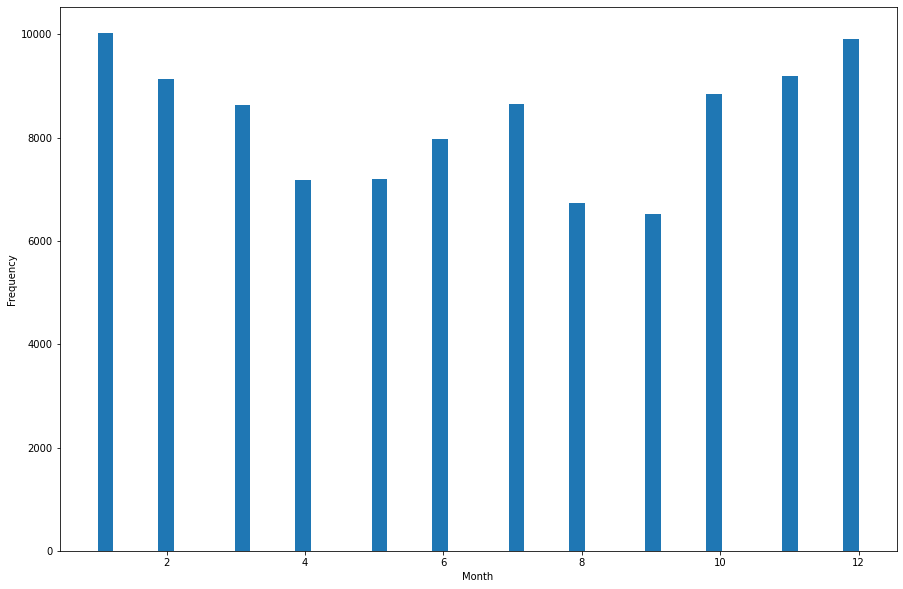

In [ ]:
##by month
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

Text(0.5, 0, 'Day of month')

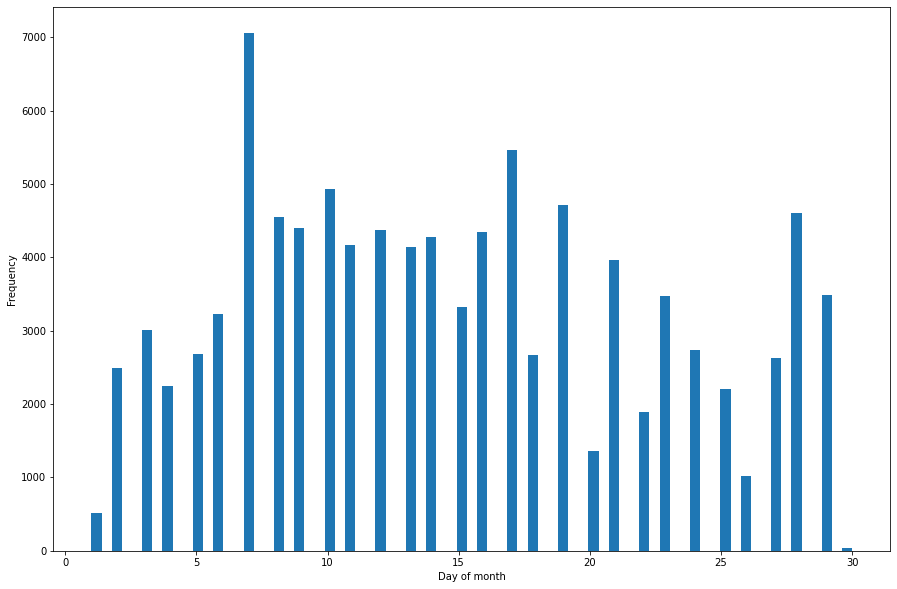

In [ ]:
##by day
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

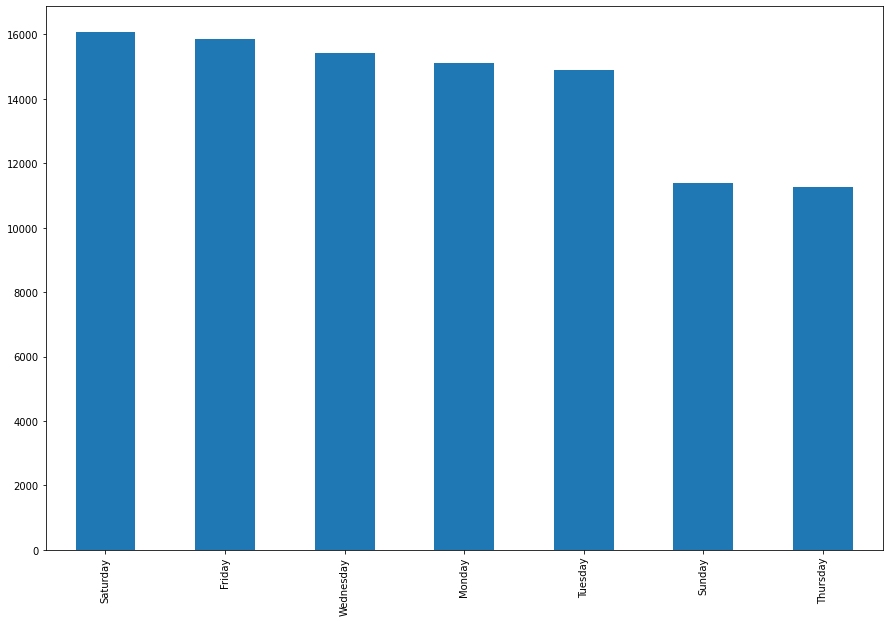

In [ ]:
##by day of week
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

In [ ]:
##Top 10 First Choices in Products
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)
products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

In [ ]:
print(products)

Graph with 11 nodes and 10 edges


{'American Roasted Chicken': Text(-0.42804294046475894, -0.90621243742264, 'American Roasted Chicken'),
 'Blue Label Large Canned Shrimp': Text(-0.18854111730504336, 0.9768895749269568, 'Blue Label Large Canned Shrimp'),
 'CDR Oregano': Text(0.18738335467874934, -0.9702386332469006, 'CDR Oregano'),
 'Colony Rye Bread': Text(0.9835080843072217, -0.12410329033837315, 'Colony Rye Bread'),
 'Fantastic Rye Bread': Text(0.7235558832287637, -0.6787171593157393, 'Fantastic Rye Bread'),
 'Good Light Beer': Text(-1.0, 0.12578353041512438, 'Good Light Beer'),
 'Hilltop Deodorant': Text(0.8775160782708297, 0.4827951657908458, 'Hilltop Deodorant'),
 'Moms Roasted Chicken': Text(-0.7197437554420554, 0.6738777462575175, 'Moms Roasted Chicken'),
 'Products': Text(0.0019524025137507433, 0.000546767975805843, 'Products'),
 'Sphinx Rye Bread': Text(-0.8561415538790196, -0.46994132505918274, 'Sphinx Rye Bread'),
 'Steady Whitening Toothpast': Text(0.4185535640915618, 0.8893200600165859, 'Steady Whitening 

(-1.208268348852258,
 1.1917764331594798,
 -1.1746870951051556,
 1.1813380367852118)

Text(0.5, 1.0, 'Top 10 First Choices in Products')

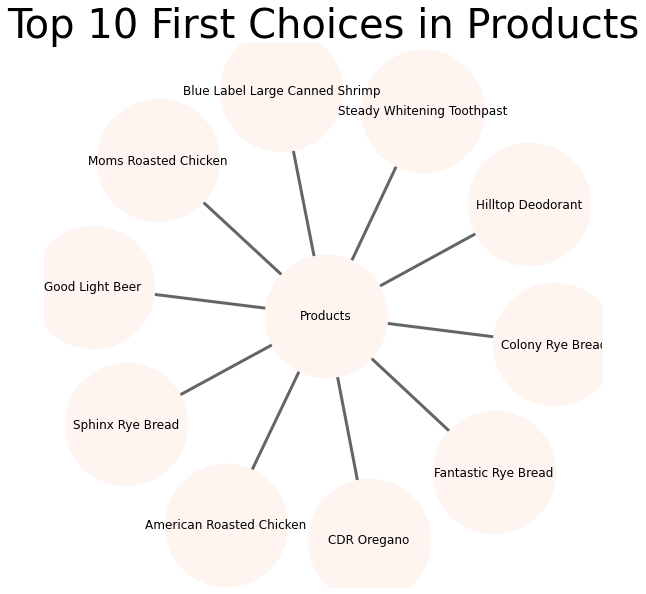

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,10)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 12)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

In [ ]:
##top 10 First Choices in Department
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

{'Beverages': Text(0.5908812333969485, -0.7322005816219415, 'Beverages'),
 'Canned Foods': Text(-0.7394591145309045, -0.6977172160019801, 'Canned Foods'),
 'Canned Products': Text(-0.16105731166407283, 0.8976675043950221, 'Canned Products'),
 'Dairy': Text(-0.8908572549214673, 0.3127338684892991, 'Dairy'),
 'Deli': Text(0.1278264823891142, -1.0, 'Deli'),
 'Departments': Text(0.0024089614750365416, 0.0074382883162954355, 'Departments'),
 'Eggs': Text(0.32897432262408566, 0.9203330293793975, 'Eggs'),
 'Frozen Foods': Text(0.9207114526277406, 0.1638715006229772, 'Frozen Foods'),
 'Health and Hygiene': Text(-0.2607627739148447, -0.7123970068193854, 'Health and Hygiene'),
 'Household': Text(0.8999655587358023, -0.3353957612214136, 'Household'),
 'Periodicals': Text(-0.6296910306119938, 0.7427181425574187, 'Periodicals'),
 'Produce': Text(-0.9215407651325229, -0.18710500200061864, 'Produce'),
 'Snack Foods': Text(0.7326002395270771, 0.6200532339049319, 'Snack Foods')}

(-1.1149772479973508,
 1.1141479354925683,
 -1.2016349680848368,
 1.1219679974642343)

Text(0.5, 1.0, 'Top 10 First Choices in Departments')

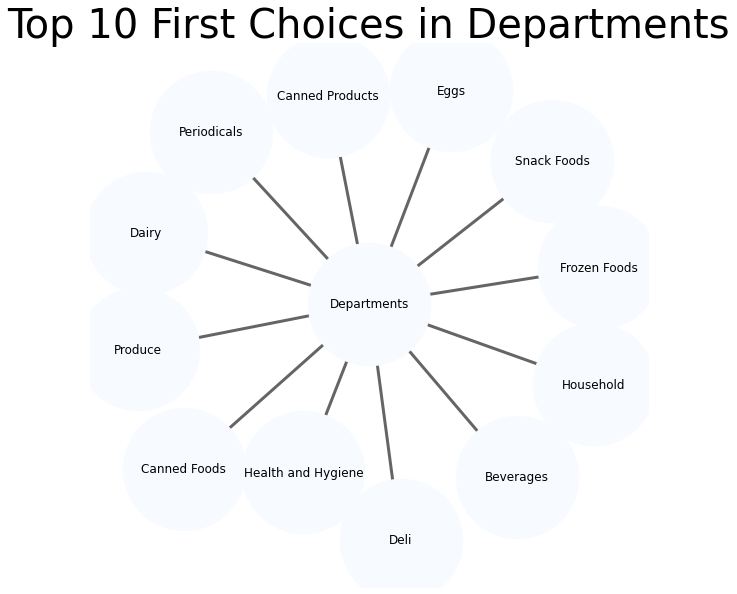

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,10)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 12)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

In [ ]:
##most Ordered Products
df['product_name'].value_counts()

Fabulous Apple Juice                           95
Hilltop Silky Smooth Hair Conditioner          89
Pearl Imported Beer                            89
Big Time Frozen Cheese Pizza                   88
Fast Cheese Dip                                88
BBB Best Canola Oil                            87
Carlson 1% Milk                                87
Tell Tale Fresh Lima Beans                     87
Carlson Low Fat String Cheese                  86
Dollar Monthly Sports Magazine                 86
Big Time Chicken TV Dinner                     86
Steady Angled Toothbrush                       86
Red Wing 25 Watt Lightbulb                     85
Booker Head Cheese                             85
Booker Low Fat String Cheese                   85
Monarch Manicotti                              85
Hermanos Potatos                               85
Sphinx White Bread                             85
Big Time Blueberry Waffles                     84
Hilltop Multi-Symptom Cold Remedy              84


In [ ]:
##most ordered products as Percentage
df['product_name'].value_counts()/len(df)*100

Fabulous Apple Juice                           0.095
Hilltop Silky Smooth Hair Conditioner          0.089
Pearl Imported Beer                            0.089
Big Time Frozen Cheese Pizza                   0.088
Fast Cheese Dip                                0.088
BBB Best Canola Oil                            0.087
Carlson 1% Milk                                0.087
Tell Tale Fresh Lima Beans                     0.087
Carlson Low Fat String Cheese                  0.086
Dollar Monthly Sports Magazine                 0.086
Big Time Chicken TV Dinner                     0.086
Steady Angled Toothbrush                       0.086
Red Wing 25 Watt Lightbulb                     0.085
Booker Head Cheese                             0.085
Booker Low Fat String Cheese                   0.085
Monarch Manicotti                              0.085
Hermanos Potatos                               0.085
Sphinx White Bread                             0.085
Big Time Blueberry Waffles                    

In [ ]:
##most visited deparments
df['department'].value_counts()

Produce                13996
Snack Foods            11350
Household              10246
Frozen Foods           10021
Baking Goods            7622
Canned Foods            6983
Dairy                   6430
Health and Hygiene      6277
Beverages               5102
Deli                    4530
Baked Goods             2961
Snacks                  2653
Alcoholic Beverages     2560
Starchy Foods           1933
Periodicals             1611
Eggs                    1518
Breakfast Foods         1258
Checkout                 684
Canned Products          671
Meat                     657
Seafood                  647
Carousel                 290
Name: department, dtype: int64

In [ ]:
##most visited deparments as percentage
df['department'].value_counts()/len(df)*100

Produce                13.996
Snack Foods            11.350
Household              10.246
Frozen Foods           10.021
Baking Goods            7.622
Canned Foods            6.983
Dairy                   6.430
Health and Hygiene      6.277
Beverages               5.102
Deli                    4.530
Baked Goods             2.961
Snacks                  2.653
Alcoholic Beverages     2.560
Starchy Foods           1.933
Periodicals             1.611
Eggs                    1.518
Breakfast Foods         1.258
Checkout                0.684
Canned Products         0.671
Meat                    0.657
Seafood                 0.647
Carousel                0.290
Name: department, dtype: float64

In [ ]:
##most visited subcategory
df['subcategory'].value_counts()

Fresh Vegetables      7678
Fresh Fruit           4403
Cheese                2969
Soup                  2909
Dried Fruit           2858
Cookies               2519
Wine                  1898
Paper Wipes           1881
Canned Vegetables     1876
Chocolate Candy       1637
Frozen Vegetables     1628
Nuts                  1596
Milk                  1587
Preserves             1574
Chips                 1523
Eggs                  1518
Lightbulbs            1346
Juice                 1336
Sliced Bread          1332
Waffles               1325
Muffins               1323
Dips                  1320
Batteries             1309
Pizza                 1306
Deli Meats            1300
Popsicles             1291
Cooking Oil           1282
Personal Hygiene      1259
Coffee                1258
Cereal                1258
Soda                  1242
Pasta                 1167
Ice Cream             1036
Hot Dogs               989
Deli Salads            986
Spices                 984
Shampoo                971
F

In [ ]:
##most visited subcategory as percentage
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables      7.678
Fresh Fruit           4.403
Cheese                2.969
Soup                  2.909
Dried Fruit           2.858
Cookies               2.519
Wine                  1.898
Paper Wipes           1.881
Canned Vegetables     1.876
Chocolate Candy       1.637
Frozen Vegetables     1.628
Nuts                  1.596
Milk                  1.587
Preserves             1.574
Chips                 1.523
Eggs                  1.518
Lightbulbs            1.346
Juice                 1.336
Sliced Bread          1.332
Waffles               1.325
Muffins               1.323
Dips                  1.320
Batteries             1.309
Pizza                 1.306
Deli Meats            1.300
Popsicles             1.291
Cooking Oil           1.282
Personal Hygiene      1.259
Coffee                1.258
Cereal                1.258
Soda                  1.242
Pasta                 1.167
Ice Cream             1.036
Hot Dogs              0.989
Deli Salads           0.986
Spices              

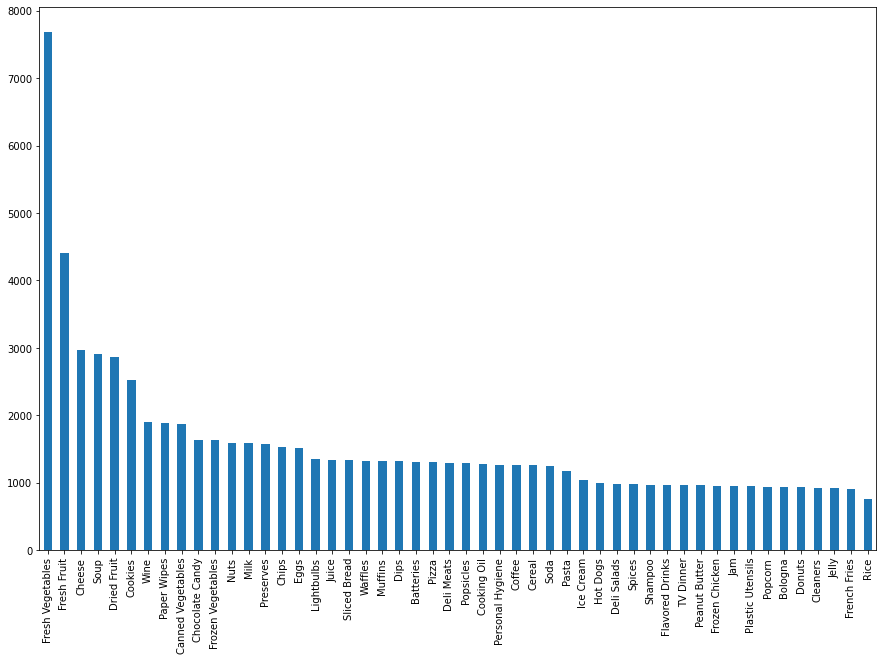

In [ ]:
##most visited subcategory
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

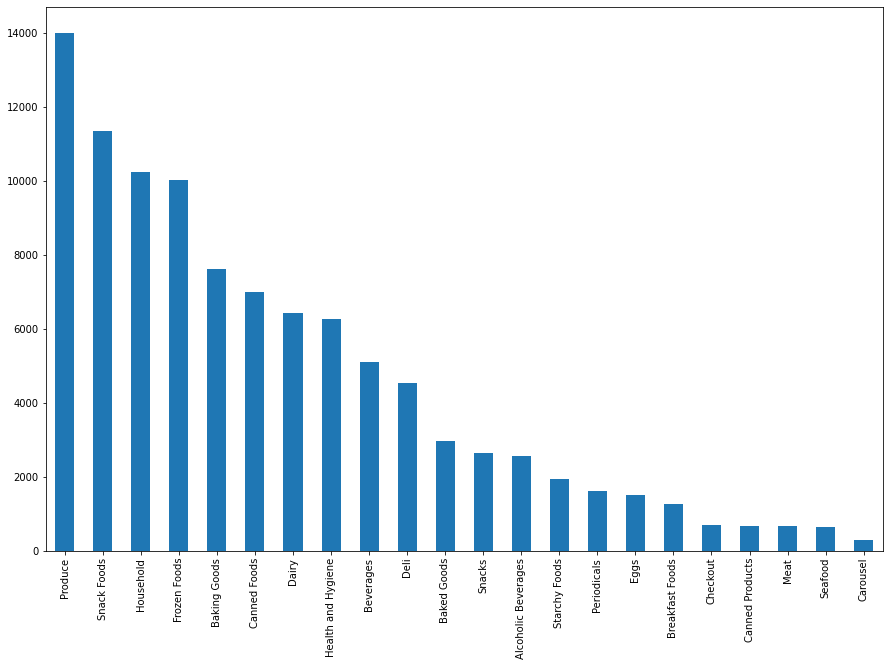

In [ ]:
##most visited department
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

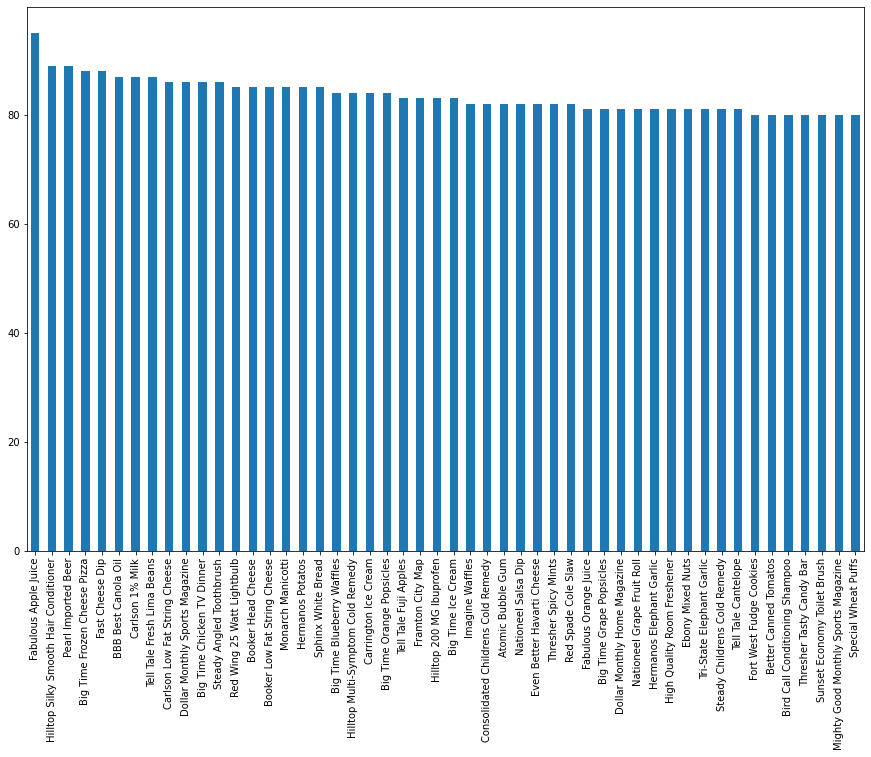

In [ ]:
##most bought product
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar() 

In [ ]:
##defining the target. Most bought products
y=df_freq_products.head(50).to_frame()
y.index

Index(['Fabulous Apple Juice', 'Hilltop Silky Smooth Hair Conditioner',
       'Pearl Imported Beer', 'Big Time Frozen Cheese Pizza',
       'Fast Cheese Dip', 'BBB Best Canola Oil', 'Carlson 1% Milk',
       'Tell Tale Fresh Lima Beans', 'Carlson Low Fat String Cheese',
       'Dollar Monthly Sports Magazine', 'Big Time Chicken TV Dinner',
       'Steady Angled Toothbrush', 'Red Wing 25 Watt Lightbulb',
       'Booker Head Cheese', 'Booker Low Fat String Cheese',
       'Monarch Manicotti', 'Hermanos Potatos', 'Sphinx White Bread',
       'Big Time Blueberry Waffles', 'Hilltop Multi-Symptom Cold Remedy',
       'Carrington Ice Cream', 'Big Time Orange Popsicles',
       'Tell Tale Fuji Apples', 'Framton City Map', 'Hilltop 200 MG Ibuprofen',
       'Big Time Ice Cream', 'Imagine Waffles',
       'Consolidated Childrens Cold Remedy', 'Atomic Bubble Gum',
       'Nationeel Salsa Dip', 'Even Better Havarti Cheese',
       'Thresher Spicy Mints', 'Red Spade Cole Slaw', 'Fabulous Orange Ju

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

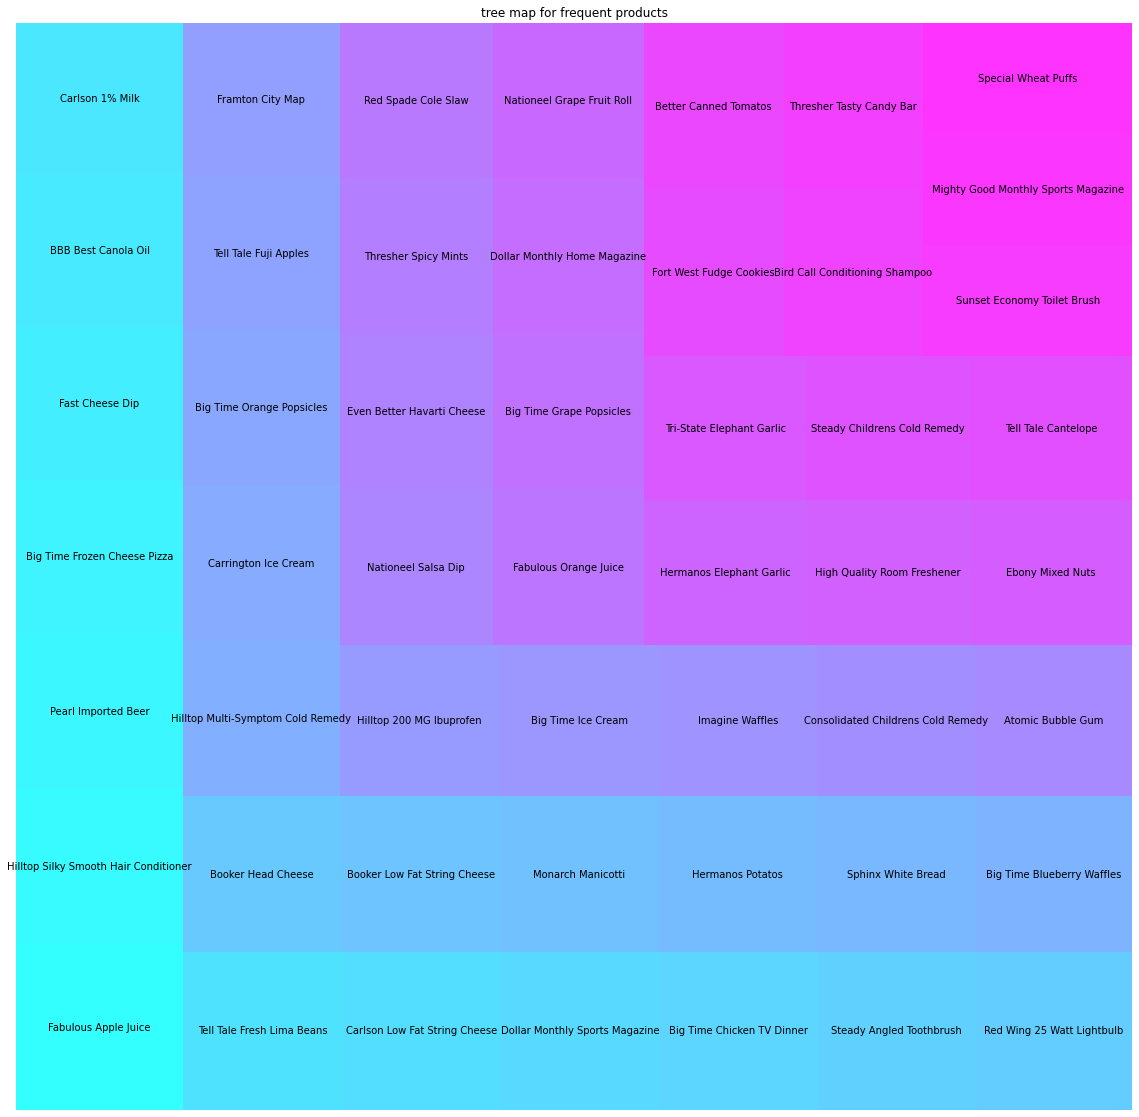

In [ ]:
##treemap of most bought products
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

### 3.2 Bivariate Analysis

In [ ]:
##visulizing relationship between customers and their products per order
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

customer_id
3         13
6          2
8         21
9          6
10         7
14         3
17         2
18         5
20        19
21         6
23         9
24         7
26         5
27         3
28         5
34         4
36        11
38         6
39        12
42        12
43         5
44         4
45        18
47         4
48        11
49         5
50         4
52        14
55        20
57         7
59        19
60         8
62         1
66         6
70         8
71        19
74        10
75         3
76        89
77        19
79        29
81         7
84        11
87        11
88         4
90         4
91         5
93        17
96        13
97        15
98         8
99       102
101        7
102       12
104       30
105        9
106        3
108        1
110        7
111        8
112       10
113        3
114        8
115       16
116        6
117       12
118       42
119       11
120        6
121        7
124        5
126        7
127        3
128        9
130        6
133        6


In [ ]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])
    
source_data

{'0~10': 3688,
 '10~20': 1836,
 '20~30': 546,
 '30~40': 250,
 '40~50': 146,
 '50~60': 69,
 '60~70': 54,
 '70~80': 65,
 '80~90': 47,
 '90~100': 34}

<BarContainer object of 10 artists>

Text(0.5, 0, 'Unit sales')

Text(0, 0.5, 'No. of customers')

Text(0.5, 1.0, 'Orders Scatter Plot')

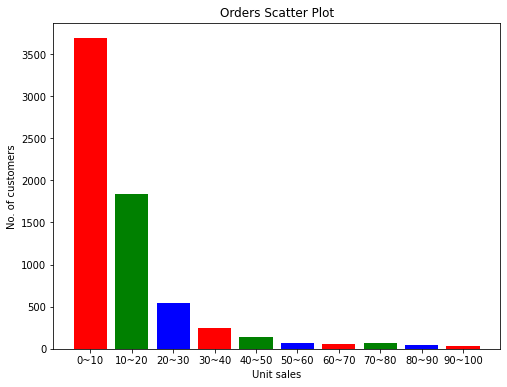

In [ ]:
font_size=10
fig_size=(8,6)    
mpl.rcParams['font.size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3

 
x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis, y_axis, color='rgb')  
# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.title("Orders Scatter Plot") 
plt.show()

In [ ]:
##creating a column that identifies a transaction ID as a basket of purchases
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [ ]:
df.head()

Unnamed: 0  product_id  time_id  customer_id  store_id  store_sales  \
0           0         337      371         6280         2         1.50   
1           1         963      371         4018         2         2.40   
2           2        1512      371         6280         2         1.62   
3           3         181      371         4018         2         2.79   
4           4         483      371         4382         2         3.88   

   store_cost  unit_sales           city state_province country  \
0      0.5100           2      Anacortes             WA     USA   
1      0.7200           1  Sedro Woolley             WA     USA   
2      0.6318           3      Anacortes             WA     USA   
3      1.0323           3  Sedro Woolley             WA     USA   
4      1.7072           2      Anacortes             WA     USA   

   customer_region_id  yearly_income gender  total_children  \
0                  79    $30K - $50K      F               5   
1                  80   $90K - $110K      F               4   
2                  79    $30K - $50K      F               5   
3                  80   $90K - $110K      F               4   
4                  79  $130K - $150K      F               0   

   num_children_at_home            education date_accnt_opened member_card  \
0                     0   High School Degree          14/01/93      Bronze   
1                     0  Partial High School          07/05/92      Silver   
2                     0   High School Degree          14/01/93      Bronze   
3                     0  Partial High School          07/05/92      Silver   
4                     0      Graduate Degree          25/07/92      Silver   

       occupation houseowner  num_cars_owned  product_class_id  brand_name  \
0  Skilled Manual          Y               3                58      Better   
1      Management          Y               2                58  Just Right   
2  Skilled Manual          Y               3                 5      Jardon   
3      Management          Y               2                61    High Top   
4      Management          N               2                61   Tell Tale   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
2                Jardon Spaghetti  53042894005  0.54         13.70   
3                High Top Lettuce  79397689700  0.93         16.10   
4       Tell Tale Corn on the Cob  80806578993  1.94         13.00   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1       18.50                   1        1               6                13   
2       10.60                   1        0              28                13   
3       14.10                   0        1              23                 5   
4       10.00                   1        0               3                10   

   shelf_width  shelf_height  shelf_depth       subcategory       category  \
0        18.40          21.6         4.76              Soup    Canned Soup   
1         6.68          10.6         9.16              Soup    Canned Soup   
2        12.80          12.6         9.81             Pasta  Starchy Foods   
3        16.10          15.1        14.50  Fresh Vegetables     Vegetables   
4        20.80          21.6         5.86  Fresh Vegetables     Vegetables   

      department family     store_type  region_id store_name  store_number  \
0   Canned Foods   Food  Small Grocery         78    Store 2             2   
1   Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Starchy Foods   Food  Small Grocery         78    Store 2             2   
3        Produce   Food  Small Grocery         78    Store 2             2   
4        Produce   Food  Small Grocery         78    Store 2             2   

In [ ]:
##filtering the cols that are going to be useful for the following steps of the analysis
cols = [77,3,1,24]
order_products=df[df.columns[cols]]

In [ ]:
order_products.head()

transaction_id  customer_id  product_id                    product_name
0        6280371         6280         337       Better Turkey Noodle Soup
1        4018371         4018         963  Just Right Chicken Noodle Soup
2        6280371         6280        1512                Jardon Spaghetti
3        4018371         4018         181                High Top Lettuce
4        4382371         4382         483       Tell Tale Corn on the Cob

In [ ]:
##Average products bought by customers per order
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']
data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

In [ ]:
data_user_products_num3.head()

sum  count       avg
customer_id                      
3             85     13  6.538462
6              4      2  2.000000
8             89     21  4.238095
9             36      6  6.000000
10            29      7  4.142857

## 4. Market Basket Analysis

In [ ]:
cols = [1,36,38,24]
departments=df[df.columns[cols]]
departments.head()

product_id       subcategory     department                    product_name
0         337              Soup   Canned Foods       Better Turkey Noodle Soup
1         963              Soup   Canned Foods  Just Right Chicken Noodle Soup
2        1512             Pasta  Starchy Foods                Jardon Spaghetti
3         181  Fresh Vegetables        Produce                High Top Lettuce
4         483  Fresh Vegetables        Produce       Tell Tale Corn on the Cob

In [ ]:
##List Of Departments
temp=['department']
for i in temp:
    print('Value Count in',i)
    print(df[i].value_counts())

Value Count in department
Produce                13996
Snack Foods            11350
Household              10246
Frozen Foods           10021
Baking Goods            7622
Canned Foods            6983
Dairy                   6430
Health and Hygiene      6277
Beverages               5102
Deli                    4530
Baked Goods             2961
Snacks                  2653
Alcoholic Beverages     2560
Starchy Foods           1933
Periodicals             1611
Eggs                    1518
Breakfast Foods         1258
Checkout                 684
Canned Products          671
Meat                     657
Seafood                  647
Carousel                 290
Name: department, dtype: int64


In [ ]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

product_id       subcategory department               product_name
3          181  Fresh Vegetables    Produce           High Top Lettuce
4          483  Fresh Vegetables    Produce  Tell Tale Corn on the Cob
18        1123  Fresh Vegetables    Produce          Tri-State Potatos
19         804  Fresh Vegetables    Produce      Ebony Elephant Garlic
20        1426  Fresh Vegetables    Produce    Hermanos Prepared Salad

In [ ]:
##featured products
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

Tell Tale Fresh Lima Beans    87
Hermanos Potatos              85
Tell Tale Fuji Apples         83
Hermanos Elephant Garlic      81
Ebony Mixed Nuts              81
Name: product_name, dtype: int64

In [ ]:
##featured products in snack foods department
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

Fast Cheese Dip               88
Nationeel Salsa Dip           82
Nationeel Grape Fruit Roll    81
Fort West Fudge Cookies       80
Nationeel Avocado Dip         79
Name: product_name, dtype: int64

In [ ]:
##in household dept
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

Red Wing 25 Watt Lightbulb     85
High Quality Room Freshener    81
Sunset Economy Toilet Brush    80
Red Wing Counter Cleaner       79
Red Wing C-Size Batteries      79
Sunset Soft Napkins            79
Sunset 75 Watt Lightbulb       79
Red Wing Toilet Paper          79
Red Wing Tissues               78
High Quality Large Sponge      78
Name: product_name, dtype: int64


In [ ]:
##in frozen foods dept
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

Big Time Frozen Cheese Pizza    88
Big Time Chicken TV Dinner      86
Carrington Ice Cream            84
Big Time Blueberry Waffles      84
Big Time Orange Popsicles       84
Big Time Ice Cream              83
Imagine Waffles                 82
Big Time Grape Popsicles        81
Golden Frozen Corn              79
Carrington Waffles              78
Name: product_name, dtype: int64


In [ ]:
##in baking goods
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

BBB Best Canola Oil               87
Super Grape Preserves             79
Plato Strawberry Jelly            76
BBB Best Apple Butter             76
Super Apple Jam                   76
Plato Low Fat Apple Butter        75
Landslide Creamy Peanut Butter    74
BBB Best Brown Sugar              74
BBB Best Strawberry Jelly         74
BBB Best Oregano                  74
Name: product_name, dtype: int64


In [ ]:
##in canned foods
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

Better Canned Tomatos             80
Better Chicken Noodle Soup        79
Just Right Turkey Noodle Soup     79
Just Right Regular Ramen Soup     78
Just Right Rice Soup              78
Better Fancy Canned Anchovies     77
Better Chicken Soup               77
Bravo Fancy Canned Anchovies      76
Just Right Canned String Beans    75
Just Right Canned Tomatos         74
Name: product_name, dtype: int64


In [ ]:
##in dairy deparment
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Carlson 1% Milk                  87
Carlson Low Fat String Cheese    86
Booker Low Fat String Cheese     85
Booker Head Cheese               85
Even Better Havarti Cheese       82
Carlson Cheese Spread            79
Booker 1% Milk                   79
Booker String Cheese             78
Carlson Mild Cheddar Cheese      78
Club Low Fat Sour Cream          78
Name: product_name, dtype: int64


In [ ]:
##in health and hygiene
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Hilltop Silky Smooth Hair Conditioner         89
Steady Angled Toothbrush                      86
Hilltop Multi-Symptom Cold Remedy             84
Hilltop 200 MG Ibuprofen                      83
Consolidated Childrens Cold Remedy            82
Steady Childrens Cold Remedy                  81
Bird Call Conditioning Shampoo                80
Steady Whitening Toothpast                    79
Faux Products Laundry Detergent               77
Consolidated Silky Smooth Hair Conditioner    76
Name: product_name, dtype: int64


In [ ]:
##in beverage
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Fabulous Apple Juice            95
Fabulous Orange Juice           81
Excellent Cream Soda            79
Skinner Strawberry Drink        78
Excellent Mango Drink           78
Token Mango Drink               78
Fabulous Strawberry Drink       78
BBB Best French Roast Coffee    77
BBB Best Regular Coffee         77
Fabulous Berry Juice            76
Name: product_name, dtype: int64


In [ ]:
##in deli deparment
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Red Spade Cole Slaw           82
Moms Sliced Turkey            79
Moms Chicken Hot Dogs         79
Moms Roasted Chicken          79
Moms Turkey Hot Dogs          78
Moms Low Fat Cole Slaw        75
Lake Foot-Long Hot Dogs       74
American Low Fat Cole Slaw    74
American Sliced Turkey        74
Moms Pimento Loaf             73
Name: product_name, dtype: int64


In [ ]:
##in alcoholic beverages dept
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Pearl Imported Beer           89
Pearl Chardonnay              78
Portsmouth Imported Beer      77
Portsmouth Light Beer         75
Pearl Chablis Wine            75
Walrus Chablis Wine           73
Good Imported Beer            73
Portsmouth Chardonnay Wine    71
Portsmouth Merlot Wine        70
Pearl Light Beer              69
Name: product_name, dtype: int64


In [ ]:
##in starchy foods
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Monarch Manicotti        85
Shady Lake Ravioli       75
Medalist Rice Medly      73
Monarch Rice Medly       70
Shady Lake Rice Medly    70
Colossal Rice Medly      70
Medalist Manicotti       70
Discover Manicotti       68
Jardon Rice Medly        66
Jardon Ravioli           66
Name: product_name, dtype: int64


In [ ]:
##in eggs dept
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Giant Small Brown Eggs         77
Urban Egg Substitute           76
Urban Small Brown Eggs         73
National Large Eggs            73
Urban Large Brown Eggs         69
Blue Medal Large Brown Eggs    69
Giant Large Brown Eggs         67
Jumbo Large Eggs               64
Blue Medal Small Brown Eggs    61
Jumbo Small Brown Eggs         60
Name: product_name, dtype: int64


## 5. Modeling

### 5.1 Preparing the model

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cols = [77,3,1,24,7,2]
product_name=df[df.columns[cols]]

In [ ]:
product_name.head()

transaction_id  customer_id  product_id                    product_name  \
0        6280371         6280         337       Better Turkey Noodle Soup   
1        4018371         4018         963  Just Right Chicken Noodle Soup   
2        6280371         6280        1512                Jardon Spaghetti   
3        4018371         4018         181                High Top Lettuce   
4        4382371         4382         483       Tell Tale Corn on the Cob   

   unit_sales  time_id  
0           2      371  
1           1      371  
2           3      371  
3           3      371  
4           2      371

In [ ]:
##Counting the transactions for each product
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

In [ ]:
productCountDf.head()

product_id  transaction_id
0           1              39
1           2              63
2           3              54
3           4              51
4           5              59

In [ ]:
##top products
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [ ]:
productCountDf.head()

product_id  transaction_id
947          948              95
892          893              89
1361        1362              89
402          403              88
545          546              88

In [ ]:
##top100 most frequent purchased products
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

In [ ]:
topProdFrame

product_id  transaction_id
947          948              95
892          893              89
1361        1362              89
402          403              88
545          546              88
501          502              87
369          370              87
920          921              87
430          431              86
359          360              86
407          408              86
476          477              86
1433        1434              85
455          456              85
1299        1300              85
1212        1213              85
1297        1298              85
883          884              85
1376        1377              84
398          399              84
393          394              84
1351        1352              84
1290        1291              83
413          414              83
520          521              83
1372        1373              83
567          568              82
987          988              82
879          880              82
69            70              82
750          751              82
853          854              82
711          712              82
1119        1120              81
945          946              81
1091        1092              81
826          827              81
1430        1431              81
518          519              81
868          869              81
439          440              81
410          411              81
479          480              81
1103        1104              80
951          952              80
1471        1472              80
1286        1287              80
659          660              80
1055        1056              80
332          333              80
874          875              80
1408        1409              80
373          374              79
106          107              79
461          462              79
1428        1429              79
1397        1398              79
383          384              79
381          382              79
425          426              79
446          447              79
453          454              79
1389        1390              79
963          964              79
1307        1308              79
362          363              79
314          315              79
335          336              79
294          295              79
819          820              79
812          813              79
1211        1212              79
854          855              79
1477        1478              78
1338        1339              78
979          980              78
1165        1166              78
504          505              78
1296        1297              78
312          313              78
897          898              78
478          479              78
974          975              78
515          516              78
475          476              78
1251        1252              78
1452        1453              78
416          417              78
462          463              78
43            44              78
485          486              78
961          962              78
1440        1441              78
364          365              78
1099        1100              78
377          378              78
623          624              78
940          941              78
1502        1503              78
1203        1204              77

In [ ]:
##orders containting the the most frequently purchased products
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

transaction_id  customer_id  product_id          product_name  \
1008        2550952         2550         948  Fabulous Apple Juice   
1060         631952          631         948  Fabulous Apple Juice   
3463        1408888         1408         948  Fabulous Apple Juice   
4896        5466775         5466         948  Fabulous Apple Juice   
5120        7663775         7663         948  Fabulous Apple Juice   

      unit_sales  time_id  
1008           2      952  
1060           2      952  
3463           3      888  
4896           3      775  
5120           5      775

In [ ]:
##grouping by transaction
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [ ]:
basket

### 5.2 One Hot Encoding

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

product_name    Applause Canned Mixed Fruit  Atomic Bubble Gum  \
transaction_id                                                   
100001063                                 0                  0   
10000768                                  0                  0   
100081011                                 0                  0   
10008743                                  0                  0   
10008914                                  0                  1   

product_name    BBB Best Canola Oil  Better Canned Tomatos  \
transaction_id                                               
100001063                         0                      0   
10000768                          0                      0   
100081011                         0                      0   
10008743                          0                      0   
10008914                          0                      0   

product_name    Better Chicken Noodle Soup  Big Time Blueberry Waffles  \
transaction_id                                                           
100001063                                0                           0   
10000768                                 0                           0   
100081011                                0                           0   
10008743                                 0                           0   
10008914                                 0                           0   

product_name    Big Time Chicken TV Dinner  Big Time Frozen Broccoli  \
transaction_id                                                         
100001063                                0                         0   
10000768                                 0                         0   
100081011                                0                         0   
10008743                                 0                         0   
10008914                                 0                         0   

product_name    Big Time Frozen Cheese Pizza  Big Time Grape Popsicles  \
transaction_id                                                           
100001063                                  0                         0   
10000768                                   0                         0   
100081011                                  0                         0   
10008743                                   0                         0   
10008914                                   0                         0   

product_name    Big Time Ice Cream  Big Time Orange Popsicles  \
transaction_id                                                  
100001063                        0                          0   
10000768                         0                          0   
100081011                        0                          0   
10008743                         0                          0   
10008914                         0                          1   

product_name    Bird Call Conditioning Shampoo  Booker 1% Milk  \
transaction_id                                                   
100001063                                    0               0   
10000768                                     0               0   
100081011                                    0               0   
10008743                                     0               0   
10008914                                     0               0   

product_name    Booker Head Cheese  Booker Low Fat String Cheese  \
transaction_id                                                     
100001063                        0                             0   
10000768                         0                             0   
100081011                        0                             0   
10008743                         0                             0   
10008914                         0                             0   

product_name    Booker String Cheese  Carlson 1% Milk  Carlson Cheese Spread  \
transaction_id                                                                 
100

In [ ]:
basket_sets.size
basket_sets.shape

661518

(6682, 99)

In [ ]:
dummy=basket_sets.head(10000)

### 5.3 Apriori Algorithm

In [ ]:
##frequent items with min_support 0.01% using Apriori Algorithm
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

In [ ]:
frequent_itemsets

support                                           itemsets
0     0.011972                      (Applause Canned Mixed Fruit)
1     0.012272                                (Atomic Bubble Gum)
2     0.013020                              (BBB Best Canola Oil)
3     0.011972                            (Better Canned Tomatos)
4     0.011823                       (Better Chicken Noodle Soup)
5     0.012571                       (Big Time Blueberry Waffles)
6     0.012870                       (Big Time Chicken TV Dinner)
7     0.011673                         (Big Time Frozen Broccoli)
8     0.013170                     (Big Time Frozen Cheese Pizza)
9     0.012122                         (Big Time Grape Popsicles)
10    0.012421                               (Big Time Ice Cream)
11    0.012571                        (Big Time Orange Popsicles)
12    0.011972                   (Bird Call Conditioning Shampoo)
13    0.011823                                   (Booker 1% Milk)
14    0.012721                               (Booker Head Cheese)
15    0.012721                     (Booker Low Fat String Cheese)
16    0.011673                             (Booker String Cheese)
17    0.013020                                  (Carlson 1% Milk)
18    0.011823                            (Carlson Cheese Spread)
19    0.012870                    (Carlson Low Fat String Cheese)
20    0.011673                      (Carlson Mild Cheddar Cheese)
21    0.012571                             (Carrington Ice Cream)
22    0.011673                               (Carrington Waffles)
23    0.011673                          (Club Low Fat Sour Cream)
24    0.012272               (Consolidated Childrens Cold Remedy)
25    0.011673                 (Dollar Monthly Computer Magazine)
26    0.012122                     (Dollar Monthly Home Magazine)
27    0.012870                   (Dollar Monthly Sports Magazine)
28    0.011823                           (Ebony Fresh Lima Beans)
29    0.012122                                 (Ebony Mixed Nuts)
30    0.011823                        (Ebony Red Delcious Apples)
31    0.012272                       (Even Better Havarti Cheese)
32    0.011823                             (Excellent Cream Soda)
33    0.011673                            (Excellent Mango Drink)
34    0.014217                             (Fabulous Apple Juice)
35    0.012122                            (Fabulous Orange Juice)
36    0.011673                        (Fabulous Strawberry Drink)
37    0.013170                                  (Fast Cheese Dip)
38    0.011673                       (Fort West Buttered Popcorn)
39    0.011972                          (Fort West Fudge Cookies)
40    0.012421                                 (Framton City Map)
41    0.011823                               (Golden Frozen Corn)
42    0.011673                    (Gulf Coast Mint Chocolate Bar)
43    0.012122                         (Hermanos Elephant Garlic)
44    0.011673                        (Hermanos Mandarin Oranges)
45    0.012721                                 (Hermanos Potatos)
46    0.011823                       (Hermanos Shitake Mushrooms)
47    0.011673                                  (Hermanos Squash)
48    0.011673                        (High Quality Large Sponge)
49    0.012122                      (High Quality Room Freshener)
50    0.012421                         (Hilltop 200 MG Ibuprofen)
51    0.012571                (Hilltop Multi-Symptom Cold Remedy)
52    0.013319            (Hilltop Silky Smooth Hair Conditioner)
53    0.011673                          (Horatio Cheese Crackers)
54    0.012272                                  (Imagine Waffles)
55    0.011673                               (James Bay City Map)
56    0.011673                    (Just Right Regular Ramen Soup)
57    0.011673                             (Just Right Rice Soup)
58    0.011823                    (Just Right Turkey Noodle Soup)
59    0.011972              (Mighty Good Monthl

In [ ]:
##association rules
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [ ]:
apriori_rules

antecedents  \
0                               (Better Canned Tomatos)   
1                         (Applause Canned Mixed Fruit)   
2                            (Big Time Frozen Broccoli)   
3                         (Applause Canned Mixed Fruit)   
4                            (Big Time Grape Popsicles)   
5                         (Applause Canned Mixed Fruit)   
6                         (Applause Canned Mixed Fruit)   
7                                (Booker String Cheese)   
8                      (Dollar Monthly Sports Magazine)   
9                         (Applause Canned Mixed Fruit)   
10                          (Ebony Red Delcious Apples)   
11                        (Applause Canned Mixed Fruit)   
12                      (Gulf Coast Mint Chocolate Bar)   
13                        (Applause Canned Mixed Fruit)   
14                        (Applause Canned Mixed Fruit)   
15                        (High Quality Room Freshener)   
16                        (Applause Canned Mixed Fruit)   
17                            (Horatio Cheese Crackers)   
18                        (Applause Canned Mixed Fruit)   
19                                (Pearl Imported Beer)   
20                           (Quick Seasoned Hamburger)   
21                        (Applause Canned Mixed Fruit)   
22                           (Red Wing Counter Cleaner)   
23                        (Applause Canned Mixed Fruit)   
24                        (Applause Canned Mixed Fruit)   
25                                 (Sphinx White Bread)   
26                        (Applause Canned Mixed Fruit)   
27                        (Sunset Economy Toilet Brush)   
28                                (Sunset Soft Napkins)   
29                        (Applause Canned Mixed Fruit)   
30                                (Tell Tale Firm Tofu)   
31                        (Applause Canned Mixed Fruit)   
32                        (Applause Canned Mixed Fruit)   
33                              (Tell Tale Fuji Apples)   
34                          (Tri-State Elephant Garlic)   
35                        (Applause Canned Mixed Fruit)   
36                                  (Atomic Bubble Gum)   
37                                     (Booker 1% Milk)   
38                                  (Atomic Bubble Gum)   
39                                 (Booker Head Cheese)   
40                        (Carlson Mild Cheddar Cheese)   
41                                  (Atomic Bubble Gum)   
42                                  (Atomic Bubble Gum)   
43                               (Excellent Cream Soda)   
44                              (Fabulous Orange Juice)   
45                                  (Atomic Bubble Gum)   
46                                  (Atomic Bubble Gum)   
47                          (Fabulous Strawberry Drink)   
48                            (Fort West Fudge Cookies)   
49                                  (Atomic Bubble Gum)   
50                      (Gulf Coast Mint Chocolate Bar)   
51                                  (Atomic Bubble Gum)   
52                                  (Atomic Bubble Gum)   
53                              (Moms Chicken Hot Dogs)   
54                              (Nationeel Avocado Dip)   
55                                  (Atomic Bubble Gum)   
56                                  (Atomic Bubble Gum)   
57                           (Sunset 75 Watt Lightbulb)   
58                                (BBB Best Canola Oil)   
59                         (Big Time Blueberry Waffles)   
60                                (BBB Best Canola Oil)   
61                       (Booker Low Fat String Cheese)   
62                                    (Hermanos Squash)   
63                                (BBB Best Canola Oil)   
64                                (BBB Best Canola Oil)   
65                (Mighty Good Monthly Sports Magazine)   
66                                (BBB Best Canola Oil)   
67                              

In [ ]:
##filtering products with higher Probability
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

antecedents  \
1590  (Applause Canned Mixed Fruit, Horatio Cheese C...   
1591                         (Big Time Frozen Broccoli)   
1601  (Dollar Monthly Sports Magazine, High Quality ...   
1604                      (Applause Canned Mixed Fruit)   
1606  (Quick Seasoned Hamburger, Applause Canned Mix...   
1611                      (High Quality Room Freshener)   
1612  (Red Wing Counter Cleaner, Applause Canned Mix...   
1613  (Red Wing Counter Cleaner, Tell Tale Fuji Apples)   
1614  (Applause Canned Mixed Fruit, Tell Tale Fuji A...   
1615                         (Red Wing Counter Cleaner)   
1616                      (Applause Canned Mixed Fruit)   
1617                            (Tell Tale Fuji Apples)   
1618    (Big Time Chicken TV Dinner, Atomic Bubble Gum)   
1619   (Big Time Chicken TV Dinner, Big Time Ice Cream)   
1620            (Atomic Bubble Gum, Big Time Ice Cream)   
1621                       (Big Time Chicken TV Dinner)   
1622                                (Atomic Bubble Gum)   
1623                               (Big Time Ice Cream)   
1625  (Consolidated Childrens Cold Remedy, Atomic Bu...   
1626    (Big Time Chicken TV Dinner, Atomic Bubble Gum)   
1627               (Consolidated Childrens Cold Remedy)   
1628                       (Big Time Chicken TV Dinner)   
1630  (Consolidated Childrens Cold Remedy, Atomic Bu...   
1631  (Consolidated Childrens Cold Remedy, Big Time ...   
1632            (Atomic Bubble Gum, Big Time Ice Cream)   
1633               (Consolidated Childrens Cold Remedy)   
1634                                (Atomic Bubble Gum)   
1635                               (Big Time Ice Cream)   
1636            (Nationeel Avocado Dip, Booker 1% Milk)   
1638                (Atomic Bubble Gum, Booker 1% Milk)   
1639                            (Nationeel Avocado Dip)   
1641                                (Atomic Bubble Gum)   
1642       (Fort West Fudge Cookies, Atomic Bubble Gum)   
1643   (Fort West Fudge Cookies, Moms Chicken Hot Dogs)   
1644         (Atomic Bubble Gum, Moms Chicken Hot Dogs)   
1645                          (Fort West Fudge Cookies)   
1646                                (Atomic Bubble Gum)   
1647                            (Moms Chicken Hot Dogs)   
1649        (BBB Best Canola Oil, Fabulous Apple Juice)   
1652                     (Booker Low Fat String Cheese)   
1655             (Hermanos Squash, Pearl Imported Beer)   
1656         (BBB Best Canola Oil, Pearl Imported Beer)   
1657                                  (Hermanos Squash)   
1658                              (BBB Best Canola Oil)   
1661     (Hermanos Squash, Sunset Economy Toilet Brush)   
1662  (BBB Best Canola Oil, Sunset Economy Toilet Br...   
1663                                  (Hermanos Squash)   
1664                              (BBB Best Canola Oil)   
1666         (BBB Best Canola Oil, Pearl Imported Beer)   
1667  (BBB Best Canola Oil, Sunset Economy Toilet Br...   
1670                              (Pearl Imported Beer)   
1671                      (Sunset Economy Toilet Brush)   
1672  (Dollar Monthly Sports Magazine, Carlson Low F...   
1673  (Dollar Monthly Sports Magazine, Better Canned...   
1674  (Carlson Low Fat String Cheese, Better Canned ...   
1675                   (Dollar Monthly Sports Magazine)   
1676                    (Carlson Low Fat String Cheese)   
1677                            (Better Canned Tomatos)   
1678      (Better Canned Tomatos, Just Right Rice Soup)   
1683                             (Carrington Ice Cream)   
1684  (Better Chicken Noodle Soup, Tell Tale New Pot...   
1686  (Tell Tale New Potatos, Fort West Buttered Pop...   
1687                       (Better Chicken Noodle Soup)   
1689                       (Fort West Buttered Popcorn)   
1690   (Better Chicken Noodle Soup, Moms Sliced Turkey)   
1695                          (Fort West Fudge Cookies)   
1696  (Steady Whitening Toothpast, Better Chicken No...   
1701                         (Th

### 5.4 Recommendations using Apriori Algorithm

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,3093):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

In [ ]:
##five recommendations
product_name = {'Better Turkey Noodle Soup'}
recommendations=recommendations_using_Apriori(product_name)
print(*recommendations[0:5], sep = "\n")

In [ ]:
##ten recommendations with a different product
product_name = {'Moms Potato Salad'}
recommendations=recommendations_using_Apriori(product_name)
print(*recommendations[0:10], sep = "\n")

In [ ]:
##15 recommendations for another product
product_name = {'Carrington Ice Cream Sandwich'}
recommendations=recommendations_using_Apriori(product_name)
print(*recommendations[0:15], sep = "\n")

### 5.5 Fpgrowth Algorithm

In [ ]:
##frequent items with min_support 0.001% using Fpgrowth Algorithm
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)

In [ ]:
freq_items

support                                           itemsets
0     0.012571                (Hilltop Multi-Symptom Cold Remedy)
1     0.012122                              (Tell Tale Cantelope)
2     0.011673                               (James Bay City Map)
3     0.013020                                  (Carlson 1% Milk)
4     0.012571                             (Carrington Ice Cream)
5     0.011673                       (Steady Whitening Toothpast)
6     0.012870                    (Carlson Low Fat String Cheese)
7     0.012571                        (Big Time Orange Popsicles)
8     0.012272                                (Atomic Bubble Gum)
9     0.014217                             (Fabulous Apple Juice)
10    0.012272               (Consolidated Childrens Cold Remedy)
11    0.011823                        (Ebony Red Delcious Apples)
12    0.012721                     (Booker Low Fat String Cheese)
13    0.011673                                  (Hermanos Squash)
14    0.011673                    (Just Right Regular Ramen Soup)
15    0.012421                            (Tell Tale Fuji Apples)
16    0.012721                                 (Hermanos Potatos)
17    0.012571                       (Big Time Blueberry Waffles)
18    0.011823                               (Moms Sliced Turkey)
19    0.011823                         (Sunset 75 Watt Lightbulb)
20    0.011972                              (Special Wheat Puffs)
21    0.012122                     (Dollar Monthly Home Magazine)
22    0.011823                           (Ebony Fresh Lima Beans)
23    0.011673                         (Quick Seasoned Hamburger)
24    0.012272                              (Nationeel Salsa Dip)
25    0.011823                    (Just Right Turkey Noodle Soup)
26    0.011673                              (Tell Tale Firm Tofu)
27    0.012721                               (Booker Head Cheese)
28    0.011823                       (Hermanos Shitake Mushrooms)
29    0.013319                              (Pearl Imported Beer)
30    0.012870                       (Big Time Chicken TV Dinner)
31    0.011823                            (Carlson Cheese Spread)
32    0.011673                                (Token Mango Drink)
33    0.011673                          (Club Low Fat Sour Cream)
34    0.012122                        (Tri-State Elephant Garlic)
35    0.013020                              (BBB Best Canola Oil)
36    0.011823                            (Red Wing Toilet Paper)
37    0.011673                            (Excellent Mango Drink)
38    0.012870                   (Dollar Monthly Sports Magazine)
39    0.011673                        (Fabulous Strawberry Drink)
40    0.011673                         (Skinner Strawberry Drink)
41    0.012122                     (Steady Childrens Cold Remedy)
42    0.011823                              (Sunset Soft Napkins)
43    0.012122                                 (Ebony Mixed Nuts)
44    0.012721                               (Sphinx White Bread)
45    0.011823                             (Moms Roasted Chicken)
46    0.012721                       (Red Wing 25 Watt Lightbulb)
47    0.011972                      (Sunset Economy Toilet Brush)
48    0.011673                          (Horatio Cheese Crackers)
49    0.011673                             (Booker String Cheese)
50    0.011673                    (Gulf Coast Mint Chocolate Bar)
51    0.013319            (Hilltop Silky Smooth Hair Conditioner)
52    0.013170                                  (Fast Cheese Dip)
53    0.011673                 (Dollar Monthly Computer Magazine)
54    0.011673                       (Fort West Buttered Popcorn)
55    0.013020                       (Tell Tale Fresh Lima Beans)
56    0.011972              (Mighty Good Monthly Sports Magazine)
57    0.012272                                  (Imagine Waffles)
58    0.012122                      (High Quality Room Freshener)
59    0.011823                            (Nati

In [ ]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
fpgrowth_rules

antecedents  \
0                   (Hilltop Multi-Symptom Cold Remedy)   
1                          (Big Time Chicken TV Dinner)   
2                   (Hilltop Multi-Symptom Cold Remedy)   
3                          (Tell Tale Fresh Lima Beans)   
4                                 (Tell Tale Cantelope)   
5                          (Tell Tale Fresh Lima Beans)   
6                                 (Tell Tale Cantelope)   
7                                    (Hermanos Potatos)   
8                                 (Tell Tale Cantelope)   
9                                     (Fast Cheese Dip)   
10                                (Tell Tale Cantelope)   
11                              (Fabulous Orange Juice)   
12                                (Tell Tale Cantelope)   
13                         (Nationeel Grape Fruit Roll)   
14                               (Thresher Spicy Mints)   
15                                (Tell Tale Cantelope)   
16               (Tell Tale Cantelope, Fast Cheese Dip)   
17              (Tell Tale Cantelope, Hermanos Potatos)   
18                  (Fast Cheese Dip, Hermanos Potatos)   
19                                (Tell Tale Cantelope)   
20                                    (Fast Cheese Dip)   
21                                   (Hermanos Potatos)   
22              (Tell Tale Cantelope, Framton City Map)   
23    (Tell Tale Cantelope, Nationeel Grape Fruit Roll)   
24       (Framton City Map, Nationeel Grape Fruit Roll)   
25                                (Tell Tale Cantelope)   
26                                   (Framton City Map)   
27                         (Nationeel Grape Fruit Roll)   
28                                 (James Bay City Map)   
29                                (Tell Tale Cantelope)   
30                                 (James Bay City Map)   
31                        (High Quality Room Freshener)   
32                                 (James Bay City Map)   
33                           (Steady Angled Toothbrush)   
34                                 (James Bay City Map)   
35                              (Moms Chicken Hot Dogs)   
36                                 (James Bay City Map)   
37                                 (Big Time Ice Cream)   
38                                 (James Bay City Map)   
39                                  (Monarch Manicotti)   
40                                 (James Bay City Map)   
41                           (Hilltop 200 MG Ibuprofen)   
42                                 (James Bay City Map)   
43                           (Red Wing Counter Cleaner)   
44                                 (James Bay City Map)   
45                              (Fabulous Orange Juice)   
46    (Dollar Monthly Sports Magazine, James Bay Cit...   
47    (Dollar Monthly Sports Magazine, Steady Angled...   
48       (James Bay City Map, Steady Angled Toothbrush)   
49                     (Dollar Monthly Sports Magazine)   
50                                 (James Bay City Map)   
51                           (Steady Angled Toothbrush)   
52    (James Bay City Map, Hilltop Silky Smooth Hair...   
53       (James Bay City Map, Hilltop 200 MG Ibuprofen)   
54    (Hilltop Silky Smooth Hair Conditioner, Hillto...   
55                                 (James Bay City Map)   
56              (Hilltop Silky Smooth Hair Conditioner)   
57                           (Hilltop 200 MG Ibuprofen)   
58                                    (Carlson 1% Milk)   
59                               (Carrington Ice Cream)   
60                      (Carlson Low Fat String Cheese)   
61                               (Carrington Ice Cream)   
62              (Hilltop Silky Smooth Hair Conditioner)   
63                               (Carrington Ice Cream)   
64          (Carlson 1% Milk, Steady Angled Toothbrush)   
65              (Carlson 1% Milk, Carrington Ice Cream)   
66     (Steady Angled Toothbrush, Carrington Ice Cream)   
67                              

### 5.6 Recommendations using Fpgrowth Algorithm

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,3093):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

In [ ]:
##five recommendations
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Steady Whitening Toothpast'})
frozenset({'Steady Whitening Toothpast', 'Thresher Tasty Candy Bar'})
frozenset({'Moms Sliced Turkey'})
frozenset({'Moms Sliced Turkey', 'Fort West Fudge Cookies'})
frozenset({'Dollar Monthly Computer Magazine'})


In [ ]:
##10 recommendations
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

In [ ]:
##15 recommendations
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

## 6. Apriori VS fpgrowth Algorithm

In [ ]:
##calculating runtime of apriori
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

support                                 itemsets
0   0.011972            (Applause Canned Mixed Fruit)
1   0.012272                      (Atomic Bubble Gum)
2   0.013020                    (BBB Best Canola Oil)
3   0.011972                  (Better Canned Tomatos)
4   0.011823             (Better Chicken Noodle Soup)
5   0.012571             (Big Time Blueberry Waffles)
6   0.012870             (Big Time Chicken TV Dinner)
7   0.011673               (Big Time Frozen Broccoli)
8   0.013170           (Big Time Frozen Cheese Pizza)
9   0.012122               (Big Time Grape Popsicles)
10  0.012421                     (Big Time Ice Cream)
11  0.012571              (Big Time Orange Popsicles)
12  0.011972         (Bird Call Conditioning Shampoo)
13  0.011823                         (Booker 1% Milk)
14  0.012721                     (Booker Head Cheese)
15  0.012721           (Booker Low Fat String Cheese)
16  0.011673                   (Booker String Cheese)
17  0.013020                        (Carlson 1% Milk)
18  0.011823                  (Carlson Cheese Spread)
19  0.012870          (Carlson Low Fat String Cheese)
20  0.011673            (Carlson Mild Cheddar Cheese)
21  0.012571                   (Carrington Ice Cream)
22  0.011673                     (Carrington Waffles)
23  0.011673                (Club Low Fat Sour Cream)
24  0.012272     (Consolidated Childrens Cold Remedy)
25  0.011673       (Dollar Monthly Computer Magazine)
26  0.012122           (Dollar Monthly Home Magazine)
27  0.012870         (Dollar Monthly Sports Magazine)
28  0.011823                 (Ebony Fresh Lima Beans)
29  0.012122                       (Ebony Mixed Nuts)
30  0.011823              (Ebony Red Delcious Apples)
31  0.012272             (Even Better Havarti Cheese)
32  0.011823                   (Excellent Cream Soda)
33  0.011673                  (Excellent Mango Drink)
34  0.014217                   (Fabulous Apple Juice)
35  0.012122                  (Fabulous Orange Juice)
36  0.011673              (Fabulous Strawberry Drink)
37  0.013170                        (Fast Cheese Dip)
38  0.011673             (Fort West Buttered Popcorn)
39  0.011972                (Fort West Fudge Cookies)
40  0.012421                       (Framton City Map)
41  0.011823                     (Golden Frozen Corn)
42  0.011673          (Gulf Coast Mint Chocolate Bar)
43  0.012122               (Hermanos Elephant Garlic)
44  0.011673              (Hermanos Mandarin Oranges)
45  0.012721                       (Hermanos Potatos)
46  0.011823             (Hermanos Shitake Mushrooms)
47  0.011673                        (Hermanos Squash)
48  0.011673              (High Quality Large Sponge)
49  0.012122            (High Quality Room Freshener)
50  0.012421               (Hilltop 200 MG Ibuprofen)
51  0.012571      (Hilltop Multi-Symptom Cold Remedy)
52  0.013319  (Hilltop Silky Smooth Hair Conditioner)
53  0.011673                (Horatio Cheese Crackers)
54  0.012272                        (Imagine Waffles)
55  0.011673                     (James Bay City Map)
56  0.011673          (Just Right Regular Ramen Soup)
57  0.011673                   (Just Right Rice Soup)
58  0.011823          (Just Right Turkey Noodle Soup)
59  0.011972    (Mighty Good Monthly Sports Magazine)
60  0.011823                  (Moms Chicken Hot Dogs)
61  0.011823                   (Moms Roasted Chicken)
62  0.011823                     (Moms Sliced Turkey)
63  0.011673                   (Moms Turkey Hot Dogs)
64  0.012721                      (Monarch Manicotti)
65  0.011823                  (Nationeel Avocado Dip)
66  0.012122             (Nationeel Grape Fruit Roll)
67  0.012272                    (Nationeel Salsa Dip)
68  0.011673                       (Pearl Chardonnay)
69  0.013319                    (Pearl Imported Beer)
70  0.011673               (Quick Seasoned Hamburger)
71  0.012272                    (Red Spade Cole Slaw)
72  0.012721             (Red Wing 25 Watt Lightbulb)
73  0.011

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

In [ ]:
##calculating runtime of fpgrowth
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

support                                 itemsets
0   0.012571      (Hilltop Multi-Symptom Cold Remedy)
1   0.012122                    (Tell Tale Cantelope)
2   0.011673                     (James Bay City Map)
3   0.013020                        (Carlson 1% Milk)
4   0.012571                   (Carrington Ice Cream)
5   0.011673             (Steady Whitening Toothpast)
6   0.012870          (Carlson Low Fat String Cheese)
7   0.012571              (Big Time Orange Popsicles)
8   0.012272                      (Atomic Bubble Gum)
9   0.014217                   (Fabulous Apple Juice)
10  0.012272     (Consolidated Childrens Cold Remedy)
11  0.011823              (Ebony Red Delcious Apples)
12  0.012721           (Booker Low Fat String Cheese)
13  0.011673                        (Hermanos Squash)
14  0.011673          (Just Right Regular Ramen Soup)
15  0.012421                  (Tell Tale Fuji Apples)
16  0.012721                       (Hermanos Potatos)
17  0.012571             (Big Time Blueberry Waffles)
18  0.011823                     (Moms Sliced Turkey)
19  0.011823               (Sunset 75 Watt Lightbulb)
20  0.011972                    (Special Wheat Puffs)
21  0.012122           (Dollar Monthly Home Magazine)
22  0.011823                 (Ebony Fresh Lima Beans)
23  0.011673               (Quick Seasoned Hamburger)
24  0.012272                    (Nationeel Salsa Dip)
25  0.011823          (Just Right Turkey Noodle Soup)
26  0.011673                    (Tell Tale Firm Tofu)
27  0.012721                     (Booker Head Cheese)
28  0.011823             (Hermanos Shitake Mushrooms)
29  0.013319                    (Pearl Imported Beer)
30  0.012870             (Big Time Chicken TV Dinner)
31  0.011823                  (Carlson Cheese Spread)
32  0.011673                      (Token Mango Drink)
33  0.011673                (Club Low Fat Sour Cream)
34  0.012122              (Tri-State Elephant Garlic)
35  0.013020                    (BBB Best Canola Oil)
36  0.011823                  (Red Wing Toilet Paper)
37  0.011673                  (Excellent Mango Drink)
38  0.012870         (Dollar Monthly Sports Magazine)
39  0.011673              (Fabulous Strawberry Drink)
40  0.011673               (Skinner Strawberry Drink)
41  0.012122           (Steady Childrens Cold Remedy)
42  0.011823                    (Sunset Soft Napkins)
43  0.012122                       (Ebony Mixed Nuts)
44  0.012721                     (Sphinx White Bread)
45  0.011823                   (Moms Roasted Chicken)
46  0.012721             (Red Wing 25 Watt Lightbulb)
47  0.011972            (Sunset Economy Toilet Brush)
48  0.011673                (Horatio Cheese Crackers)
49  0.011673                   (Booker String Cheese)
50  0.011673          (Gulf Coast Mint Chocolate Bar)
51  0.013319  (Hilltop Silky Smooth Hair Conditioner)
52  0.013170                        (Fast Cheese Dip)
53  0.011673       (Dollar Monthly Computer Magazine)
54  0.011673             (Fort West Buttered Popcorn)
55  0.013020             (Tell Tale Fresh Lima Beans)
56  0.011972    (Mighty Good Monthly Sports Magazine)
57  0.012272                        (Imagine Waffles)
58  0.012122            (High Quality Room Freshener)
59  0.011823                  (Nationeel Avocado Dip)
60  0.011673                     (Carrington Waffles)
61  0.011823                         (Booker 1% Milk)
62  0.011673                       (Pearl Chardonnay)
63  0.011823                   (Excellent Cream Soda)
64  0.011823               (Red Wing Counter Cleaner)
65  0.011673                   (Moms Turkey Hot Dogs)
66  0.011673                   (Just Right Rice Soup)
67  0.011823              (Sphinx Pumpernickel Bread)
68  0.012870               (Steady Angled Toothbrush)
69  0.012421               (Hilltop 200 MG Ibuprofen)
70  0.011673                       (Red Wing Tissues)
71  0.011972         (Bird Call Conditioning Shampoo)
72  0.011673            (Carlson Mild Cheddar Cheese)
73  0.012

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

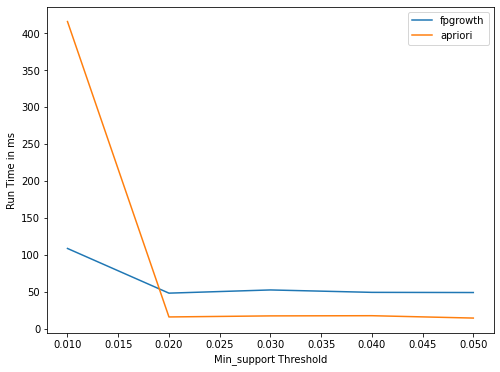

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")